*Credits: Applied Data Analysis (ADA) course at EPFL (https://dlab.epfl.ch/teaching/fall2020/cs401/)*

# Overview on K-NN

Let's create some complex shapes to observe how K-Nearest Neighbors (K-NN) behaves.

Text(0.5, 1.0, 'Circles')

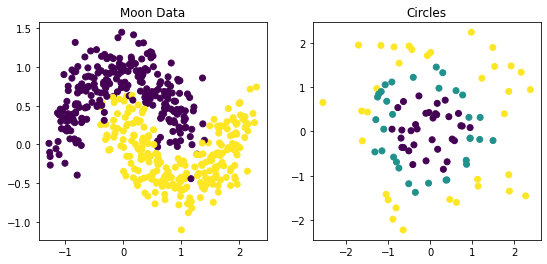

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons, make_gaussian_quantiles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

n_samples_moons = 500
n_samples_circles = 100
X_moons, y_moons = make_moons(n_samples=n_samples_moons, noise=0.2, random_state=0)
X_circles, y_circles = make_gaussian_quantiles(n_samples=n_samples_circles, random_state=0)


fig, axs = plt.subplots(1, 2, figsize=(9,4))

axs[0].scatter(X_moons[:,0], X_moons[:,1], c=y_moons)
axs[0].set_title('Moon Data')

axs[1].scatter(X_circles[:,0], X_circles[:,1], c=y_circles)
axs[1].set_title('Circles')

Plotting function to predict the class of different areas of the features space. Do not worry about the inners of this function.

In [2]:
# Plotting helper 
# Source: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
from matplotlib.colors import ListedColormap

def plot_prediction(model, X, y, ax, K):
    # step size in the mesh
    h = .02
    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title("K = {}".format(K))

Create K-NN models for both dataset with *K=1*, *K=15*, *K=len(dataset)*. For this purpose, you can use `sklearn`'s implementation `kNeighborsClassifier`, which was already imported above. Check https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html for details.

In [3]:
# K = 1
clf_moons_1 = KNeighborsClassifier(1)
clf_moons_1.fit(X_moons, y_moons)
clf_circles_1 = KNeighborsClassifier(1)
clf_circles_1.fit(X_circles, y_circles)

# K = 15
clf_moons_15 = KNeighborsClassifier(15)
clf_moons_15.fit(X_moons, y_moons)
clf_circles_15 = KNeighborsClassifier(15)
clf_circles_15.fit(X_circles, y_circles)

# K = all
clf_moons_all = KNeighborsClassifier(n_samples_moons)
clf_moons_all.fit(X_moons, y_moons)
clf_circles_all = KNeighborsClassifier(n_samples_circles)
clf_circles_all.fit(X_circles, y_circles)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

Before visualizing the results, what do you think will happen to each of the models created? How do you think the selectiong for `K` will influence the classification results? What would happen if *K=1*? And if *K=len(dataset)*?

`insert your thoughts here`

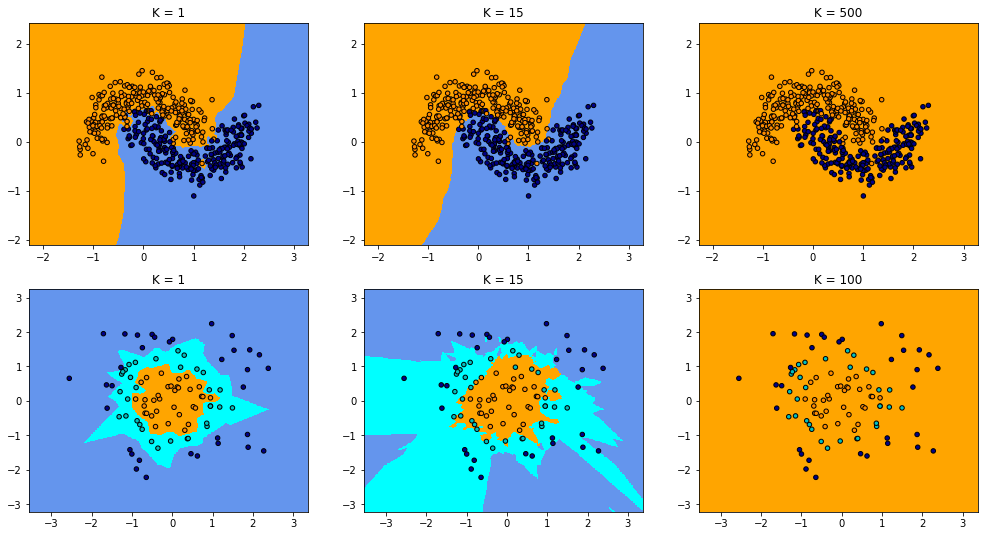

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(17,9))

plot_prediction(clf_moons_1, X_moons, y_moons, axs[0][0], 1)
plot_prediction(clf_moons_15, X_moons, y_moons, axs[0][1], 15)
plot_prediction(clf_moons_all, X_moons, y_moons, axs[0][2], n_samples_moons)


plot_prediction(clf_circles_1, X_circles, y_circles, axs[1][0], 1)
plot_prediction(clf_circles_15, X_circles, y_circles, axs[1][1], 15)
plot_prediction(clf_circles_all, X_circles, y_circles, axs[1][2], n_samples_circles)

Choosing an appropriate hyperparameter `K` is key to the success of modelling a classification task using K-NN. As general rules: 
* Small K --> low bias, high variance. The extreme case of this is *K=1*, where the bias will be minimal but the modelling is probably overfitting the training data. Observe the moons dataset, where the outliers are creating a classification area which is clearly not correct. If we check the circles dataset, we can also see the sharpness of the classification boundaries.
* Large K --> high bias, low variance. Averaging between more datapoints will smooth the classification boundary, but this might lead to an underfitting of the training data. Check the extreme case *K=len(dataset)*, where the class selected for any point in the space is the one with the most number of samples.
* Choice of K depends on the dataset. As you may observe, choosing *K=15* seems to be suitable for our moons dataset, but it is suboptimal for the circles dataset (a smaller K would probably perform better).

In order to choose the appropriate hyperparameter `K`, the training data must be subdivided into training a validation, and the validation subset would be used to evaluate what is the best choice for `K` given the models created with the training subset. After this, the final evaluation of the model must be done using the testing data, in order to avoid potential biases of the hypermarameters choice.

**We recommend that you try out different K values to observe how the predictions change! At the same time, try changing the number of samples for each dataset, so that you can see how this also affects the search for an optimal K**

### Bonus: Comparison against a Logistic Regressor

We will train a Logistic Regression model on the data and explore the decision boundary learned:

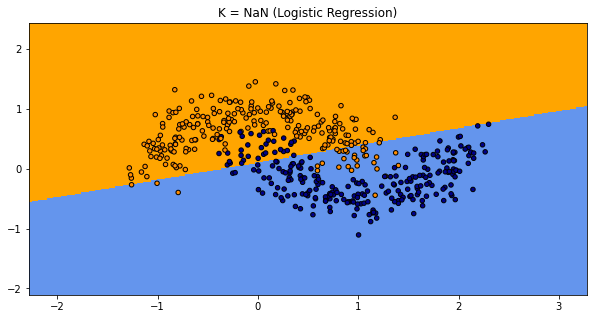

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X_moons, y_moons)

fig, ax = plt.subplots(figsize=(10,5))
plot_prediction(log_reg, X_moons, y_moons, ax, "NaN (Logistic Regression)")